 master-thesisInput:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import torch
from torch import distributions, optim
from sklearn.metrics import mean_squared_error

In [30]:
'''from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')'''

"from google.colab import drive\ndrive.mount('/content/drive')\n\n%cd /content/drive/MyDrive/GitHub/master-thesis\n\nimport sys\nsys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')"

In [2]:
%cd ..

/home/anuarsantoyo/PycharmProjects/master-thesis


In [31]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *
from clustering.utils import *

## Optimization Settings

In [32]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 7
# Overall Time Period
start_time='2020-09-15' # Mitte November/ Anfang Dezember bis Februar
end_time='2020-12-01'#'2021-02-01''2020-12-01'
test_end_time='2021-02-01' # Begin Vaccination Wave


dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

## Initialize Observations

In [33]:
df_obs_initial = pd.read_csv('data/observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=end_time, rolling_avg=rolling_avg_obs)
observed_train = torch.tensor(df_obs[observation], requires_grad=False, device=device, dtype=dtype)

# Initialize Observations Training
df_obs_test, initial_newly_infected_test = initialize_observations(df_obs_initial, start=start_time, end=test_end_time, rolling_avg=rolling_avg_obs)
observed_train_test = df_obs_test[observation]

df_obs.head(3)

,Date,number_of_deaths,newly_infected,hospitalization
0,2020-09-15,0.857143,345.428571,13.142857
1,2020-09-16,0.857143,382.000000,14.285714
2,2020-09-17,0.857143,403.285714,14.142857


# Experiment Settings

In [34]:
method_type = 'linear'
#method_type = 'nn'

input_type = 'factor_data'
#input_type = 'group_data'
#input_type = 'mobility_data'

# Load Input Data

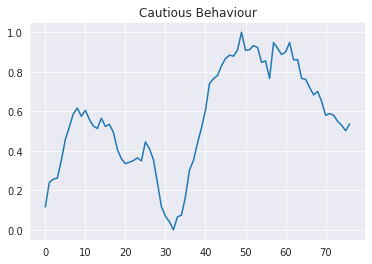

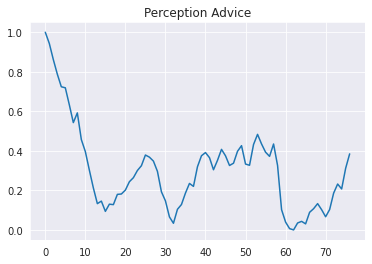

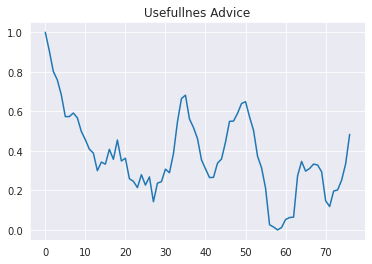

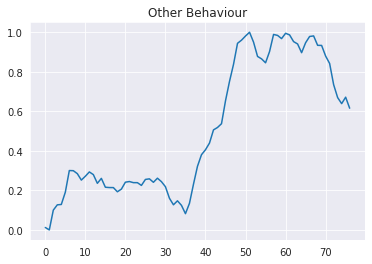

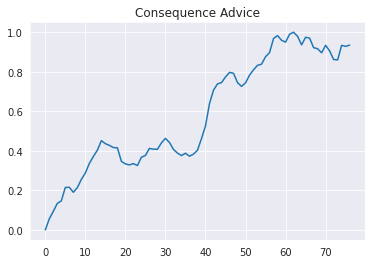

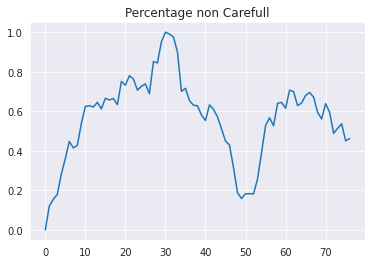

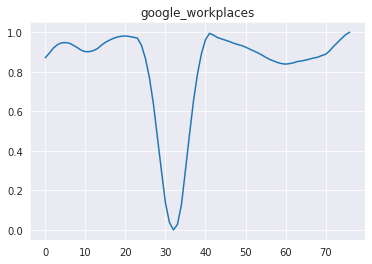

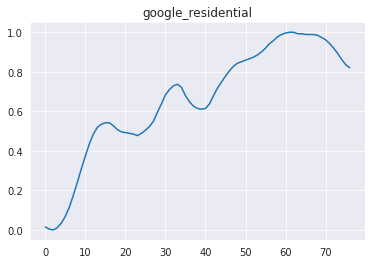

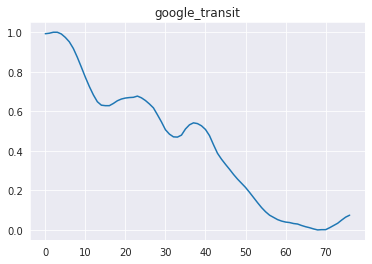

In [35]:
input_data_cols = ['F0_cautious_behaviour','F1_perception_advice' ,'F2_applicability_usefullness_advice' , 'F3_behaviour_others','F4_consequence_advice']#]#
input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/fa_data_model_input.csv', rolling_avg=7, input_data_cols=input_data_cols)
plt.plot(input_data[:,0])
plt.title('Cautious Behaviour')
plt.show()

plt.plot(input_data[:,1])
plt.title('Perception Advice')
plt.show()

plt.plot(input_data[:,2])
plt.title('Usefullnes Advice')
plt.show()

plt.plot(input_data[:,3])
plt.title('Other Behaviour')
plt.show()

plt.plot(input_data[:,4])
plt.title('Consequence Advice')
plt.show()
input_data_cols = ''
input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/group_percentage_non_careful.csv', rolling_avg=7, input_data_cols=None)
plt.plot(input_data[:,0])
plt.title('Percentage non Carefull')
plt.show()
input_data_cols = ['google_workplaces', 'google_residential', 'google_transit'] #['apple_driving', 'apple_walking', 'apple', 'google_retail', 'google_grocery', 'google_workplaces', 'google_residential', 'google_transit', 'google', 'telco', 'applegoogle']
input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/mobility_data_denmark.csv', rolling_avg=7, input_data_cols=input_data_cols)
plt.plot(input_data[:,0])
plt.title('google_workplaces')
plt.show()

plt.plot(input_data[:,1])
plt.title('google_residential')
plt.show()

plt.plot(input_data[:,2])
plt.title('google_transit')
plt.show()

In [36]:
input_data

array([[0.87096774, 0.01526718, 0.99254658],
       [0.8938172 , 0.00381679, 0.99503106],
       [0.91935484, 0.        , 1.        ],
       [0.93682796, 0.01145038, 1.        ],
       [0.94623656, 0.03435115, 0.99130435],
       [0.94758065, 0.06870229, 0.97391304],
       [0.94489247, 0.11450382, 0.9515528 ],
       [0.93413978, 0.17557252, 0.91801242],
       [0.92204301, 0.24045802, 0.87329193],
       [0.90860215, 0.30916031, 0.82360248],
       [0.90188172, 0.3740458 , 0.77267081],
       [0.90188172, 0.4351145 , 0.72546584],
       [0.90725806, 0.48473282, 0.68322981],
       [0.91666667, 0.51908397, 0.6484472 ],
       [0.93413978, 0.53435115, 0.6310559 ],
       [0.94892473, 0.54198473, 0.62857143],
       [0.95967742, 0.54198473, 0.62857143],
       [0.96908602, 0.52671756, 0.63975155],
       [0.97580645, 0.50763359, 0.65341615],
       [0.97983871, 0.49618321, 0.6621118 ],
       [0.9811828 , 0.49236641, 0.66708075],
       [0.97849462, 0.48854962, 0.66956522],
       [0.

In [37]:
input_data_cols = ['labels'] #['apple_driving', 'apple_walking', 'apple', 'google_retail', 'google_grocery', 'google_workplaces', 'google_residential', 'google_transit', 'google', 'telco', 'applegoogle']
input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/group_percentage_non_careful_behavioural.csv', rolling_avg=1, input_data_cols=input_data_cols)

In [20]:
if input_type == 'factor_data':
  input_data_cols = ['F0_cautious_behaviour','F1_perception_advice' ,'F2_applicability_usefullness_advice' , 'F3_behaviour_others','F4_consequence_advice']#]#
  input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/fa_data_model_input.csv', rolling_avg=1, input_data_cols=input_data_cols)

elif input_type == 'group_data':
  input_data_cols = ''
  input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/group_percentage_non_careful.csv', rolling_avg=7, input_data_cols=None)
elif input_type == 'mobility_data':
  input_data_cols = ['google_workplaces', 'google_residential', 'google_transit'] #['apple_driving', 'apple_walking', 'apple', 'google_retail', 'google_grocery', 'google_workplaces', 'google_residential', 'google_transit', 'google', 'telco', 'applegoogle']
  input_data = get_model_input(start=start_time, end=end_time, split_date=None, path='data/modeling/mobility_data_denmark.csv', rolling_avg=7, input_data_cols=input_data_cols)
input_data_size = input_data.shape[1]
input_data_size

5

In [21]:
#df_mob = pd.read_csv('data/modeling/mobility_data.csv')
#df_mob.date = pd.to_datetime(df_mob.date, format='%Y-%m-%d')
#df_mob = df_mob[df_mob['region'] == 'denmark'].reset_index(drop=True)
#df_mob.drop(columns=['region'], inplace=True)
#df_mob.to_csv('data/modeling/mobility_data_denmark.csv', index=False)
#df_mob.head()

## Initialize Model Parameter

### Initialize helper parameter

In [38]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)

### Initialize method parameter

In [39]:
if method_type == 'linear':
  method = Linear(device=device, dtype=dtype, input_size=input_data_size)
  
elif method_type == 'nn':
  method = NN(device=device, dtype=dtype, input_size=input_data_size)

### Initialize alpha and phi

In [40]:
exp_parameters = pd.read_csv('data/modeling/experiments_estimated_parameters.csv', index_col=0)

In [41]:
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
#dict_param['real_values']['alpha'] = torch.tensor(exp_parameters.describe()['alpha']['50%'], requires_grad=False, device=device, dtype=dtype)
#dict_param['real_values']['phi'] = torch.tensor(exp_parameters.describe()['phi']['50%'], requires_grad=False, device=device, dtype=dtype)
dict_param

{'prime_values': {'alpha': tensor(-3.5835, requires_grad=True),
  'phi': tensor(-0.0020, requires_grad=True)},
 'real_values': {'alpha': tensor(0.0280, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

# Optimization

## Test Optimization

In [16]:
#torch.manual_seed(42)
_input_data = get_model_input(start=start_time, end=test_end_time, split_date=end_time, path='data/modeling/fa_data_model_input.csv', rolling_avg=7, input_data_cols=factor)

F0_cautious_behaviour
F1_perception_advice
F2_applicability_usefullness_advice
F3_behaviour_others
F4_consequence_advice


In [42]:
from tqdm.auto import tqdm

plot = False
#[['F0_cautious_behavior'],['F1_perception_advice'] ,['F2_applicability_usefullness_advice'] , ['F3_behaviour_others'],['F4_consequence_advice']]
#[['google_workplaces'], ['google_residential'], ['google_transit']]
#[None]
factor_info = dict()
for factor in tqdm([['labels']], desc=f'Factors', leave=True):

    #torch.manual_seed(42)
    _input_data = get_model_input(start=start_time, end=test_end_time, split_date=end_time, path='data/modeling/group_percentage_non_careful_behavioural.csv', rolling_avg=1, input_data_cols=factor)
    input_data = _input_data[0]

    test_input_data = np.concatenate((_input_data[0], _input_data[1]), axis=0)

    input_data_size = input_data.shape[1]


    meta_epoch_params = {}
    loss_development = {}
    meta_epoch_pred = {}
    meta_epoch_pred_test = {}
    meta_epoch_test_mse = {}

    for meta_epoch in tqdm(range(100), desc=f'Meta Epochs', leave=False):
        #method = NN(device=device, dtype=dtype, input_size=input_data_size)
        method = Linear(device=device, dtype=dtype, input_size=input_data_size)

        dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)

        params_to_be_optimized = method.get_parameters() + [dict_param['prime_values']['phi'], dict_param['prime_values']['alpha']]
        optimizer = optim.Adam(params_to_be_optimized, lr=0.01)

        loss_development[meta_epoch] = []

        if plot:
            with torch.no_grad():
                print(f'{factor} Before Optimization')
                print(f'Metha epoch: {meta_epoch}\n'
                      f'Linear Factors: {method.get_parameters()[0].detach().numpy()}\n',
                      f'Bias: {method.get_parameters()[1].detach().numpy()}\n',
                      f'Alpha: {dict_param["real_values"]["alpha"]}\n',
                      f'Phi: {dict_param["real_values"]["phi"]}\n')

        for i in range(1, 1000):
            iteration_time = time.time()
            optimizer.zero_grad()

            # transform alphi, phi
            dict_param = transform_prime_variables(dict_param)

            # forward pass
            expected = epid_model(R=method.calculate_R(input_data), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

            # calc loss
            comparison_loss_train = calc_mse(expected, observed_train) * dict_param['real_values']['phi'] # calc_negative_binomnial_loss(expected, observed_train, dict_param['real_values']['phi']) #
            method_loss = method.calculate_loss()
            a=method.get_parameters()
            #linear_param_loss = calc_prior_linear_loss(factor, method.get_parameters(), device, dtype )
            model_param_loss = calc_prior_loss(dict_param, device, dtype)
            loss = comparison_loss_train + method_loss + model_param_loss #+ linear_param_loss

            loss_development[meta_epoch].append(loss.item())

            # backward pass
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                if params_to_be_optimized[1].grad.detach().numpy()[0] == 0:
                    print('Gradient is zero')
                    break

        if params_to_be_optimized[1].grad.detach().numpy()[0] == 0:
            del loss_development[meta_epoch]
            continue

        else:
            with torch.no_grad():
                expected_test = epid_model(R=method.calculate_R(test_input_data), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

                meta_epoch_params[meta_epoch] = {'lin_params': method.get_parameters(),'loss': loss,'alpha': dict_param["real_values"]["alpha"].detach().numpy(),'phi': dict_param["real_values"]["phi"].detach().numpy()}

                meta_epoch_pred[meta_epoch] = expected.cpu().detach().numpy()
                meta_epoch_pred_test[meta_epoch] = expected_test.cpu().detach().numpy()
                test_size = _input_data[1].shape[0]
                meta_epoch_test_mse[meta_epoch] = mean_squared_error(expected_test.cpu().detach().numpy()[-test_size:], observed_train_test[-test_size:].reset_index(drop=True))

                if plot:
                    print('normal')
                    plt.plot(expected_test.cpu().detach().numpy())
                    plt.plot(observed_train_test)
                    plt.show()

                    print('tail')
                    plt.plot(expected_test.cpu().detach().numpy()[-test_size:])
                    plt.plot(observed_train_test[-test_size:].reset_index(drop=True))
                    plt.show()

        if plot:
            with torch.no_grad():

                meta_epoch_params[meta_epoch] = (method.get_parameters(), loss, dict_param["real_values"]["alpha"].detach().numpy(), dict_param["real_values"]["phi"].detach().numpy())
                print('After Optimization')
                print(f'Metha epoch: {meta_epoch}\n'
                      f'Linear Factors: {method.get_parameters()[0].detach().numpy()}\n',
                      f'Bias: {method.get_parameters()[1].detach().numpy()}\n',
                      f'Alpha: {dict_param["real_values"]["alpha"]}\n',
                      f'Phi: {dict_param["real_values"]["phi"]}')


                plt.plot(df_obs['Date'], expected.cpu().detach().numpy(), label='predicted')
                plt.plot(df_obs['Date'], observed_train.cpu().detach().numpy(), label='observed')
                plt.legend()
                plt.show()
                plt.plot()


    factor_info[str(factor)] = {'meta_epoch_params': meta_epoch_params, 'meta_epoch_pred': meta_epoch_pred,'meta_epoch_pred_test': meta_epoch_pred_test, 'loss_development': loss_development, 'meta_epoch_test_mse':meta_epoch_test_mse}



Factors:   0%|          | 0/1 [00:00<?, ?it/s]

Meta Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero
Gradient is zero


In [43]:
import _pickle as cPickle

with open(r"data/modeling/split_tests/split_test_50_new/behaviour_noncarefull50.pickle", "wb") as output_file:
    cPickle.dump(factor_info, output_file)

None


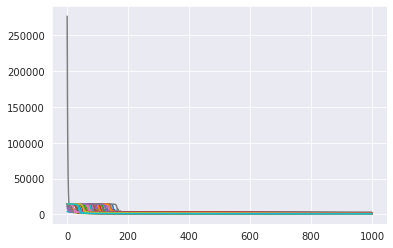

In [155]:
for key in factor_info.keys():
    print(key)
    for i in factor_info[key]['loss_development'].keys():
        try:
            plt.plot(factor_info[key]['loss_development'][i])
        except:
            pass
    plt.show()

In [156]:
f0 = [meta_epoch_params[i][0][0].detach().numpy()[0][0] for i in meta_epoch_params.keys()]
#f1 = [meta_epoch_params[i][0][0].detach().numpy()[0][1] for i in meta_epoch_params.keys()]
#f2 = [meta_epoch_params[i][0][0].detach().numpy()[0][2] for i in meta_epoch_params.keys()]
#f3 = [meta_epoch_params[i][0][0].detach().numpy()[0][3] for i in meta_epoch_params.keys()]
#f4 = [meta_epoch_params[i][0][0].detach().numpy()[0][4] for i in meta_epoch_params.keys()]
b = [meta_epoch_params[i][0][1].detach().numpy()[0] for i in meta_epoch_params.keys()]
alpha = [meta_epoch_params[i][2] for i in meta_epoch_params.keys()]
phi = [meta_epoch_params[i][3] for i in meta_epoch_params.keys()]
loss_param = [float(meta_epoch_params[i][1].detach().numpy()) for i in meta_epoch_params.keys()]

KeyError: 0

In [ ]:
params_dist_df = pd.DataFrame({'f0': f0, 'b': b, 'alpha': alpha, 'phi': phi, 'loss': loss_param})#, 'f1': f1, 'f2': f2, 'f3': f3, 'f4': f4

In [ ]:
params_dist_df = params_dist_df[params_dist_df['loss']<20000]

In [ ]:
params_dist_df.boxplot(column=['f0', 'b'])#, 'f1', 'f2', 'f3', 'f4'
plt.show()